/usr/lib/python3/dist-packages/requests/__init__.py:87: RequestsDependencyWarning: urllib3 (2.2.3) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
/home/paperspace/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


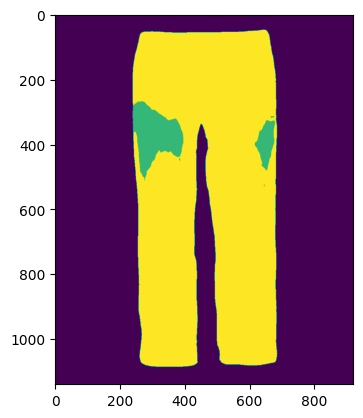

In [1]:
from transformers import SegformerImageProcessor, AutoModelForSemanticSegmentation
from PIL import Image
import requests
import matplotlib.pyplot as plt
import torch.nn as nn

processor = SegformerImageProcessor.from_pretrained("sayeed99/segformer_b3_clothes")
model = AutoModelForSemanticSegmentation.from_pretrained("sayeed99/segformer_b3_clothes")

image = Image.open("/home/paperspace/src/styler/src/tmp_dir/khaki_pants.png")
inputs = processor(images=image, return_tensors="pt")

outputs = model(**inputs)
logits = outputs.logits.cpu()

upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],
    mode="bilinear",
    align_corners=False,
)

pred_seg = upsampled_logits.argmax(dim=1)[0]
plt.imshow(pred_seg)

In [2]:
import cv2

image_path = '/home/paperspace/src/styler/src/tmp_dir/khaki_pants.png'
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

In [3]:
# Find Cloth category
cloth_map = {
    0: "Background", 1: "Hat", 2: "Hair", 3: "Sunglasses", 4: "Upper-clothes", 5: "Skirt", 6: "Pants", 7: "Dress", 8: "Belt", 9: "Left-shoe", 10: "Right-shoe", 11: "Face", 12: "Left-leg", 13: "Right-leg", 14: "Left-arm", 15: "Right-arm", 16: "Bag", 17: "Scarf"
}

In [5]:
upsampled_logits.shape

torch.Size([1, 18, 1140, 920])

In [12]:
import torch
torch.mean(upsampled_logits[0,[4,5,6,7]], dim=[1,2]).argmax()

tensor(2)

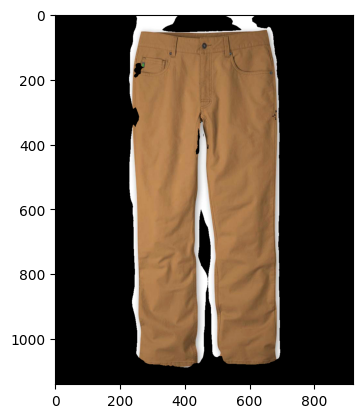

In [41]:
t1 = upsampled_logits[0,6].detach().numpy()
t1[t1 < t1.mean()] = 0
t1[t1 >= t1.mean()] = 1
t2 = t1.reshape((t1.shape[0], t1.shape[1], 1))
original_image_copy = original_image * t2
plt.imshow(original_image_copy.astype(int))

In [37]:

# RGB
# import numpy as np
original_image_copy = original_image_copy[np.nonzero(original_image_copy)]

In [75]:
original_image_copy[np.nonzero(t1)].mean(axis=0)


array([169.72983, 129.64154,  92.06599], dtype=float32)